# Séries Temporais - Aula 4

## Plano de Aula

### Objetivos

O objetivo desta aula é apresentar o conceito de séries temporais, características e alguns modelos de previsão de dados futuros.



### Habilidades a serem desenvolvidas

Ao final desta aula, o aluno deverá saber:

- Identificar tedência, ciclos e sazonalidade de uma série temporal
- Realizar análise exploratória da série
- Ajustar modelos de previsão




### Bibliotecas usadas

- numpy;
- pandas;
- matplotlib;
- statsmodels;


### Sugestões 

Leitura do modelo de séries temporais desenvolvido pelo facebook (que comentei em aula) https://facebook.github.io/prophet/
<br>
<br>

# Noções Básicas

Uma série temporal é um conjunto de observações ordenadas no tempo, não necessariamente igualmente espaçadas, que apresentam dependência serial, isto é, dependência entre instantes de tempo. Por exemplo:

- Valores diários de poluição em uma determinada cidade;
- Valores mensais de temperatura;
- Índices diários na Bolsa de Valores



### Objetivo da análise de séries temporais


- Descrever o comportamento da série;

- Encontrar periodicidades;

- Obter possíveis explicações para o comportamento da série, geralmente através de variáveis auxiliares;

- Predizer o comportamento futuro, o que possiibilita  fazer planos a longo, médio ou curto prazo e tomar decisões apropriadas;

### Decomposição

Uma série temporal pode ser decomposta nos seguintes componentes:

- **Tendência ($T$)**: indica o seu comportamento ao longo do tempo, ou seja, se é crescente, decrescente ou estável. Além disso indica a velocidade destas mudanças. 

<br>

- **Ciclos ($C$)**: são  oscilações de subida e de queda nas séries, de forma suave e repetida, ao longo da componente de tendência. Os movimentos cíclicos tendem a ser irregulares.

<br>

- **Sazonalidade ($S$)**: são oscilações de subida e de queda que sempre ocorrem em um determinado período do ano, do mês, da semana ou do dia. Os movimentos facilmente previsíveis, ocorrendo em intervalos regulares de tempo. A partir da sazonalidade pode-se classificar uma série temporal em aditiva ou multiplicativa. Uma **série é aditiva** se a magnitude da **sazonalidade mantem-se constante** ao longo do prazo. A série é denominada **multiplicativa** se ao longo do tempo a **amplitude da sazonalidade aumenta**.

<br>

- **Ruído Aleatório ($\epsilon$)**: ou erro no período $t$ são variações irregulares ou flutuações inexplicáveis, resultado de fatos fortuitos e inesperados.
<br>

Em outras palavras, uma série temporal $Z(t)$ pode ser reconstruída atrvés de uma função que depende das componentes acima $f(T_t,C_t,S_t,\epsilon_t)$. Uma série aditiva é representada por $Z(t)=T_t+C_t+S_t+\epsilon_t$, equanto a multiplicativa é dada por $Z(t)=T_t \times C_t \times  S_t \times \epsilon_t$

**Exemplo 1**: A série abaixo representa a venda de shampoo. Note que a série apresenta tendência crescente e não sazonal. As ocilações são os movimentos cíclicos. Observe que o consumo de shampoo aumenta no decorrer do tempo (eixo y), mas não acontece de forma sazonal.

[<img src="tend_cresc.png"  width="40%" height="40%"/>](tend_cresc.png)

**Exemplo 2**: O gráfico abaixo é referente à produção de cerveja na Austrália. É uma série crescente e com sazonalidade aditiva. O consumo de cerveja aumenta ao longo do período, o pico ocorre a cada intervalo de tempo, mas a amplitude da curva não muda. A média de vendas a cada sazonalidade não sofre grande variaões.

<img src="tend_cresc_aditiv_sazonal.png" height="70%" width="70%"/>

**Exemplo 3**: Esta série é referente à quantidade de passageiros na Airline. Note que a tendência também é crescente e sazonal. Com o decorrer do tempo a quantidade de passageiros que viajam pela companhia aérea aumenta (eixo y), porém a periodicidade da sazonalidade continua marcada no gráfico. Trata-se de uma série com sazonalidade multiplicativa. Neste caso, a quantidade de passageiros a cada período sazonal aumenta.

<img src="tend_cresc_mult_sazonal.png" height="70%" width="70%"/>

**Exemplo 4**: No exemplo abaixo é representado a média da temperatuda diária em uma determinada cidade ao longo de 1 ano. Note que a série é estável (não possui tendência crescente tampouco decrescente), é sazonal aditiva (possui periodicidade bem marcada e sem grande variação na amplitude).

<img src="estacionaria_sazonal.png" height="70%" width="70%"/>

### Estacionariedade

Ao se desenvolver um modelo preditivo de séries temporais, uma das suposições mais frequentes a respeito de uma série temporal é a de que ela é estacionária, ou seja, que se desenvolve ao longo do tempo de forma aleatória em torno de uma média constante, refletindo estabilidade (exemplo 4). Entretanto, a maioria das séries que encontramos no dia-a-dia apresentam alguma forma de não-estacionariedade (exemplos 1 ao 3).

Como a maioria dos procedimentos de análise estatística de séries temporais supõem que estas sejam estacionárias é comum realizar transformações nos dados originais para torna-los estacionários. A transformação mais usada é a da diferenças sucessivas. A primeira diferença de uma série $Z(t)$, em que $t$ é a variável de tempo, é definida por:

$$ \Delta Z(t) = Z(t) - Z(t-1) $$

a segunda diferença é

$$ \Delta^2 Z(t) =  \Delta[\Delta Z(t)] = (Z(t) - Z(t-1))-(Z(t-1)-Z(t-2)) = Z(t) - 2Z(t-1) + Z(t-2) $$

De modo geral, a n-ésima diferência de $Z(t)$ é

$$ \Delta^n Z(t) =  \Delta[\Delta^{n-1} Z(t)] $$

Em situações normais, suficiente tomar uma ou duas diferenças para que a série se torne estacionária.


<br>

Considerando o **exemplo 1**, ao calcularmos a primeira diferença da série, produzimos uma nova série temporal estacionária (gráfico abaixo). Esta base de dados é explorada no notebook de exercícios.

![amostra](shampoo_pimeira_dif.png)

### Autocorrelação


No estudo de uma série temporal é importante entender a relação entre as observações atuais e as anteriores. Uma forma de realizar esta avaliação é através das funções de autocorrelação. Autocorrelação significa a correlação de valores de uma mesma variável ordenados no tempo. Em outras palavras, descreve como o valor presente da série está relacionado aos valores passados.

Uma série temporal pode ter componentes como tendência, sazonalidade, ciclos e resíduos. A ACF considera todos esses componentes enquanto encontra correlações, portanto, é um gráfico **completo** de autocorrelação.

O estudo da autocorrelação é realizado de forma gráfica, por meio da Função de autocorrelação (ACF – Autocorrelation Function).

**Exemplo 5**: No exemplo abaixo, observa-se que os dados desta série são altamente correlacionados. A barra na defasagem (lag) 0 é um porque representa a correlação da série com ela mesmo, serve como ponto de referência para as próximas defasagens.

![](acf_1.png)

**Exemplo 6**: No exemplo abaixo, a correlação é significativa (fora do limite de confiança, linhas azuis).

![](acf_2.png)

### Autocorrelação Parcial

A PACF (Partial Autocorrelation Function) é uma função de autocorrelação parcial. Basicamente, em vez de encontrar correlações do presente com as defesagens (leg), como o ACF, ele encontra correlação dos resíduos (que permanecem após a remoção dos efeitos que já são explicados pelas lag anteriores) com o próximo valor da defasagem, portanto 'parcial' e não 'completo' conforme removemos as variações já encontradas antes de encontrar a próxima correlação. Portanto, se houver alguma informação oculta no resíduo que possa ser modelada pelo próximo atraso, poderemos obter uma boa correlação e manteremos essa próxima defasagem como um recurso durante a modelagem. Lembre-se de que, ao modelar, não queremos manter muitos recursos correlacionados, pois isso pode criar problemas de multicolinearidade. Portanto, precisamos manter apenas os recursos relevantes.

**Exemplo 7**: Neste exemplo, a função de autocorrelação mostra que há correlação significativa da defasagem 1 a até a 9, sendo que a medida que nos afastamos do presente, a correlação é menor. Entretanto ao observar o gráfico de autocorrelação parcial observamos que apenas a primeira defasagem tem correlação realmente significante.

![](acf_pcf.png)

## Processo Estocástico e Séries Temporais

Um processo estocástico ${Z(t), t \in T }$ é uma coleção de variáveis aleatórias. Como para todo $t \in T$, $Z(t)$ é uma variável aleatória, podemos considerar que na verdade $Z(t)$ é uma função que depende de dois parâmetros $Z(t, \omega)$, em que para cada $\omega$ obtemos uma trajetória, isto é, uma **série temporal**.

Essa coleção é dita estritamente estacionária se a distribuição de probabilidade conjunta de $X (t_1 ), \cdots, X (t_k )$ é a mesma de $X(t_1 +\tau),...,X(t_k +\tau)$. Ou seja, o deslocamento da origem dos tempos por uma quantidade $\tau$ não tem efeito na distribuição conjunta que portanto depende apenas dos intervalos entre $t_1, \cdots , t_k$ 



![](proc_estocastico.png)

## Modelos Preditivos

Os métodos para previsão de séries temporais baseiam-se na extrapolação de características de observações passadas e no inter-relacionamento entre essas observações, fornecendo previsões acuradas se o futuro apresentar comportamento similar ao passado. 

Uma série temporal pode ser expressada da seguinte forma
$$Z(t) = f(t) + a_t $$

Em que  $f(t)$, chamada de sinal, é uma função do tempo completamente determinada e $ a_t $ é uma sequência aleatória, independente de $ f(t) $. Supõe-se que as variáveis aleatórias. $ a_t $ sejam não correlacionadas, tenham média zero e variância constante. Com estas características, $a_t$ é chamada de ruído branco.

Nesta aula abordaremos alguns dos modelos de séries temporais mais usados.

### Modelo Autoregressivo (AR)

Como vimos na aula anterior, em um modelo de regressão múltipla, prevemos a variável de interesse usando uma combinação linear de preditores. Em um modelo de autorregressão, prevemos a variável de interesse usando uma combinação linear de valores passados da variável. O termo autoregressão indica que é uma regressão da variável contra ela mesma.

Um **modelo autorregresivo de ordem p** AR(p) pode ser escrito da seguinte forma:

$$ z_t = c + \phi z_{t-1} + \phi z_{t-2} + \cdots + \phi z_{t-p} + \epsilon_t $$

Ou de forma mais simplificada:

$$\phi(B)z_t =  \epsilon_{t} $$

em que $\phi(.)$ é um polinômio de ordem p com $\phi(0)=1$. Por exemplo, para p=1

$$ z_t =  \phi_t z_{t-1} + \epsilon_t \Longrightarrow (1- \phi_t B)^{-1} = z_t $$



em que $\epsilon_t$ é um ruído branco e $c=(1-\sum_{i=1}^p \phi_i)\mu$, onde $\mu$ é a média da série observada
Considerando o gráfico PACF,  a ordem $p$ é o valor da defasagem antes da primeira lag o valor da autocorrelação parcial está contido no intervalo de confiança.

In [173]:
import numpy as np
import pandas as pd
import matplotlib as plt

from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from matplotlib import pyplot



import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
from statsmodels.tsa.stattools import acf, pacf

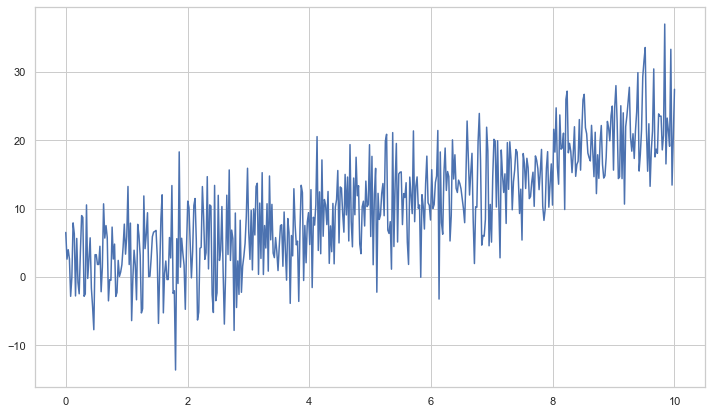

In [158]:
#cria sequencia de numeros com dist uniforme
t = np.linspace(0, 10, 500)

#distribuição normal com media 0 e desvio padrao 5
a_t = np.random.normal(0,5,500)

#cria tendencia crescente
ye = np.exp(t**0.5)

#cria uma serie f(t) + a_t
y = ye + a_t
#plot
pyplot.figure(figsize=(12,7))
pyplot.plot(t,y)

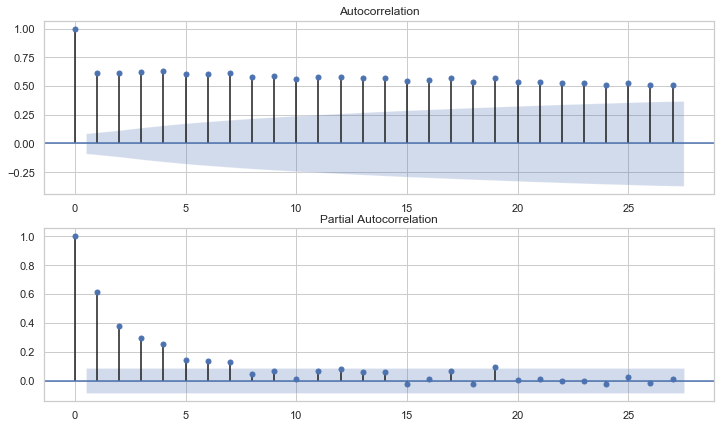

In [157]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


pyplot.figure(figsize=(12,7))

pyplot.subplot(211)
plot_acf(y, ax=pyplot.gca())

pyplot.subplot(212)
plot_pacf(y, ax=pyplot.gca())
pyplot.show()

In [155]:
model_ar = AR(y)
model_ar_fit = model_ar.fit(maxlag=7)

In [151]:
#parametros
print(model_ar_fit.params)

#defasagens do modelo
model_ar_fit.k_ar

[0.93897288 0.09303464 0.09911118 0.13664891 0.19084927 0.12860705
 0.13277082 0.14801934]


7

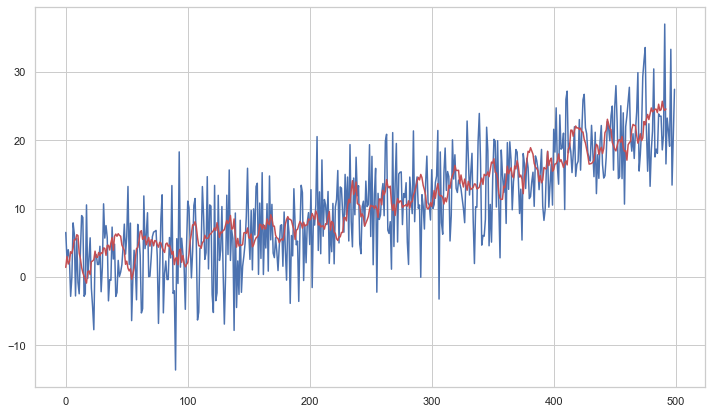

In [169]:
pyplot.figure(figsize=(12,7))
pyplot.plot(y, 'b-', label='data')
pyplot.plot(model_fit.fittedvalues, 'r-')
pyplot.show()

### Modelo Médias Móveis

Processo de média móvel (MA), um processo em que o valor presente da série é definido como uma combinação linear de **erros** passados. Assumimos que os erros sejam distribuídos independentemente com a distribuição normal. O processo MA da ordem q é definido como,

$$z_t = c + \epsilon_t + \Theta_1 \epsilon_{t-1} + \Theta_2 \epsilon_{t-2} + \cdots + \Theta_q \epsilon_{t-q}$$

em que $\epsilon_t$ é um ruído branco e $c$ é a média da série. Geralmente este modelo é escrito de forma mais simplificada:

$$z_t = \Theta(B) \epsilon_{t} $$

A ordem q do processo MA é obtida a partir do gráfico do ACF, é a defasagem  anterior a lag em o grádico ACF está contida no intervalo de confiança pela primeira vez. Como sabemos que o PACF captura correlações de resíduos e atrasos nas séries temporais, podemos obter boas correlações para os atrasos mais próximos e para os atrasados anteriores. 

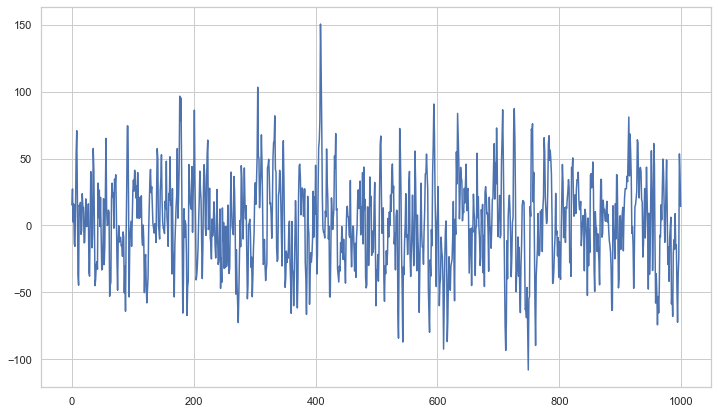

In [163]:
xma = np.random.normal(0,25,1000)

#cria uma série  MA com média 2 and of order 2
y5 = 2 + xma + 0.8*np.roll(xma,-1) + 0.6*np.roll(xma,-2) #+ 0.6 *np.roll(xma,-3)

pyplot.figure(figsize=(12, 7)) 
pyplot.plot(y5)


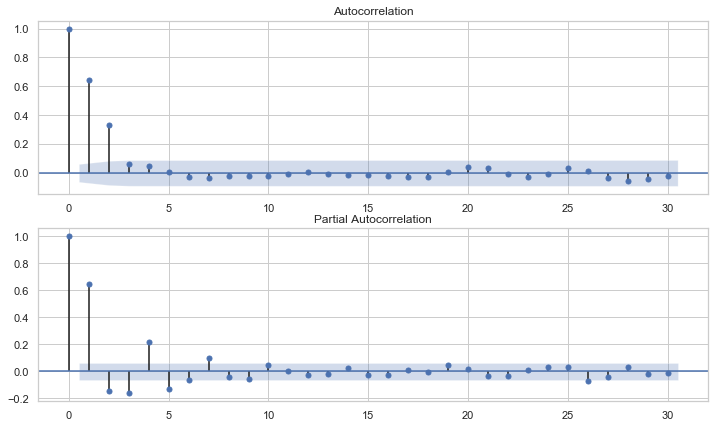

In [164]:
pyplot.figure(figsize=(12,7))

pyplot.subplot(211)
plot_acf(y5, ax=pyplot.gca())

pyplot.subplot(212)
plot_pacf(y5, ax=pyplot.gca())
pyplot.show()

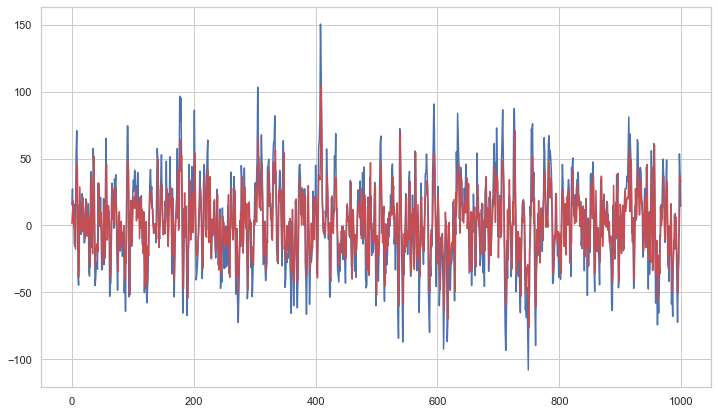

In [170]:
model_ma = ARMA(y5, order=(0, 3))
model_ma_fit = model_ma.fit()

pyplot.figure(figsize=(12,7))
pyplot.plot(y5, 'b-', label='data')
pyplot.plot(model_ma_fit.fittedvalues, 'r-')
pyplot.show()

## Modelo Autorregressivo e de Médias Móveis

O método Média Móvel Autoregressiva (ARMA) modela o próximo passo na sequência como uma função linear das observações e erros residuais em etapas anteriores. Combina os modelos de regressão automática (AR) e média móvel (MA).

A notação para o modelo envolve a especificação da ordem dos modelos AR(p) e MA(q) como parâmetros para uma função ARMA, por exemplo ARMA(p, q). Um modelo ARMA pode ser usado para desenvolver modelos AR ou MA.
O processo MA da ordem q é definido como,

$$z_t = (\phi z_{t-1} + \phi z_{t-2} + \cdots + \phi z_{t-p}) - ( \epsilon_t + \Theta_1 \epsilon_{t-1} + \Theta_2 \epsilon_{t-2} + \cdots + \Theta_q \epsilon_{t-q})$$

Podemos reescrever a equação de forma mais simplificada:

$$ \phi(B) = \theta(B) \epsilon_t $$

O método é adequado para séries temporais univariadas, sem componentes sazonais e de tendência.

O modelo AR(p) tentam capturar os efeitos do momento e da reversão média.

O modelo MA(q) tenta capturar (explicar) os efeitos de choque observados nos termos do ruído branco. Estes efeitos de choque podem ser considerados eventos inesperados que afetam o processo de observação. 



**colocar exemplo**

## Modelo Autorregressivo Integrado de Média Móveis

O modelo de Média Móvel Integrada Autoregressiva (ARIMA) modela o próximo passo na sequência como uma função linear das observações diferenciadas e erros residuais em etapas anteriores.

Ele combina os modelos de Autorregressão (AR) e Média móvel (MA), bem como uma etapa diferenciada de pré-processamento da sequência para tornar a sequência estacionária, denominada integração (I).

A notação para o modelo envolve a especificação da ordem dos modelos AR(p), I(d) e MA(q) como parâmetros para uma função ARIMA, por exemplo, ARIMA(p, d, q). Um modelo ARIMA também pode ser usado para desenvolver modelos AR, MA e ARMA. Expressão:

$$ \phi(B)(1-B)^d = \theta(B) \epsilon_t $$

O método é adequado para séries temporais univariadas com tendência e sem componentes sazonais.

## Modelo Sazonal Autorregressivo Integrado de Média Móveis

Muitas séries temporais também apresentam um componente sazonal importante e pode ser preciso modelar este componente também para se obter um modelo mais assertivo. Para tal foram desenvolvidos os modelos ARIMA sazonais, conhecidos como SARIMA(p,d,q)x(P,D,Q)s sendo s o período correspondente à sazonalidade.
A inclusão do componente sazonal de ao modelo se dá de maneira multiplicativa, e a representação de um modelo SARIMA(p,d,q)x(P,D,Q)s pode ser escrita, de forma compacta:

$$\phi(B^s )\phi(B)(1− B)^d (1− Bs )^D z_t = \theta(B^s )\theta(B)\epsilon_t$$

onde $\theta(B^s)$ representam os coeficientes sazonais da autorregressão,$\theta(B^s)$ representam os coeficientes sazonais das médias móveis, e $(1 − B^s)^D$ é o operador diferença de ordem D, para a diferenciação sazonal da série.


O método Sazonal Autorregressivo Integrado de Média Móveis (SARIMA) modela a próxima etapa na sequência como uma função linear das observações diferenciadas, erros, observações sazonais diferenciadas e erros sazonais em etapas anteriores.

Ele combina o modelo ARIMA com a capacidade de executar a mesma modelagem de Autorregressão, diferenciação e média móvel no nível sazonal.

A notação para o modelo envolve a especificação da ordem dos modelos AR (p), I (d) e MA (q) como parâmetros para uma função ARIMA e AR (P), I (D), MA (Q) e m parâmetros no nível sazonal, por exemplo SARIMA (p, d, q) (P, D, Q) m onde "m" é o número de etapas de tempo em cada estação (o período sazonal). Um modelo SARIMA pode ser usado para desenvolver modelos AR, MA, ARMA e ARIMA.

O método é adequado para séries temporais univariadas com tendência e / ou componentes sazonais.